# Various simulations related to the signature and the randomized signature

### Mechanism for Brownian Motion

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [4]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

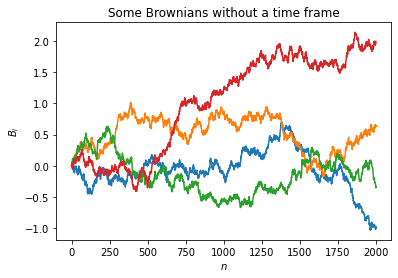

In [5]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Mechanism for random matrices and vectors

In [6]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [7]:
A, v

(array([[[-0.08017195,  1.01214126, -0.46397857,  0.09128573],
         [ 0.2195547 , -0.06325451,  0.17820721, -0.32209875]],
 
        [[-0.49560827,  0.24475264, -0.13389206, -0.91567644],
         [-0.15811045, -0.972804  ,  0.46883449, -0.51722596]],
 
        [[ 0.7794485 , -0.68917259,  1.05571189, -1.55038051],
         [ 1.80502688, -0.64131664,  0.63971948, -0.25378884]]]),
 array([-0.79791536,  1.64915002,  1.8999066 ]))

### Time&step structure

In [8]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

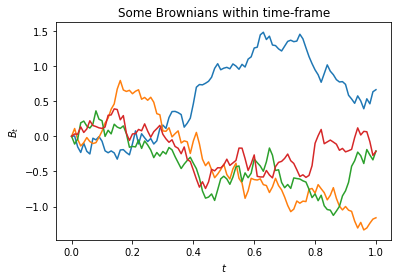

In [9]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(101))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Constructing the process

In [10]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [11]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

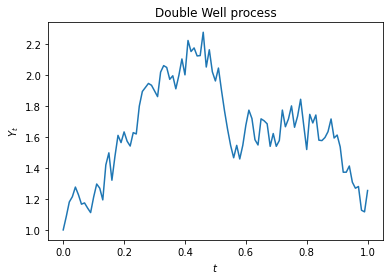

In [12]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Y_t$")
plt.show()

### Constructing the randomized signature

In [13]:
k = 10
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

In [14]:
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

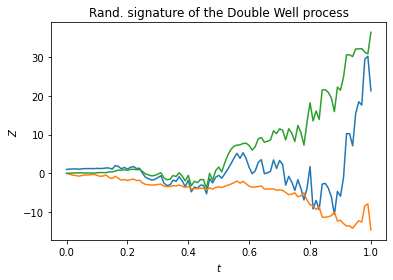

In [15]:
for i in range(3):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

In [16]:
Z.shape

(101, 10)

### Training the linear, time-homogeneous readout - without regularization

In [42]:
model1 = LinearRegression().fit(Z, Y)

In [19]:
r_sq_1 = model1.score(Z, Y)
print(f"coefficient of determination: {r_sq_1}")

coefficient of determination: 0.9999999983346861


In [20]:
print(f"intercept: {model1.intercept_}")

intercept: 0.8772626243591053


In [41]:
print(f"coefficients: {model1.coef_}")

coefficients: [ 0.07434461 -0.77429434 -0.3199009  -0.15100643 -0.52016836  0.37047685
 -0.10996833 -1.38078519  0.03176658 -0.20988287]


In [22]:
Y_pred_1 = model1.predict(Z)

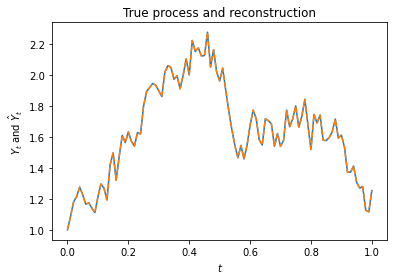

In [23]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_1, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Training the linear, time-homogeneous readout - with regularization

In [81]:
model2 = Lasso(alpha=0.10)
model2.fit(Z, Y)

Lasso(alpha=0.1)

In [82]:
r_sq_2 = model2.score(Z, Y)
print(f"coefficient of determination: {r_sq_2}")

coefficient of determination: 0.814201073944154


In [83]:
print(f"intercept: {model2.intercept_}")

intercept: 1.2876107478602854


In [84]:
print(f"coefficients: {model2.coef_}")

coefficients: [-0.          0.          0.08653262  0.         -0.         -0.
 -0.          0.         -0.         -0.        ]


In [85]:
Y_pred_2 = model2.predict(Z)

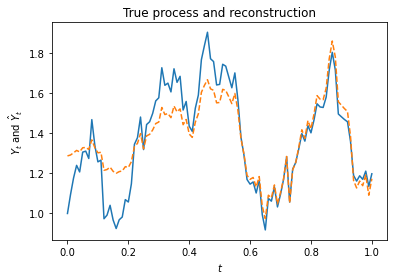

In [86]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_2, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Gaussians

In [263]:
n_sim = 1000
k = 15
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
Z_big[0:N,].shape

(101, 15)

In [264]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z

In [265]:
model3 = Ridge(alpha=1.0)
model3.fit(Z_big, Y_big)

Ridge()

In [266]:
r_sq_3 = model3.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.999999808760822


In [267]:
print(f"intercept: {model3.intercept_}")

intercept: 1.14858850463612


In [268]:
print(f"coefficients: {model3.coef_}")

coefficients: [-0.14859647  0.05114452 -0.00412695  0.0434674  -0.03215351  0.07403637
 -0.11952778 -0.12809272  0.02998868 -0.05548361 -0.0515443  -0.11844704
  0.03435387  0.12174251  0.1344312 ]


In [269]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

In [270]:
Y_pred_3 = model3.predict(Z)

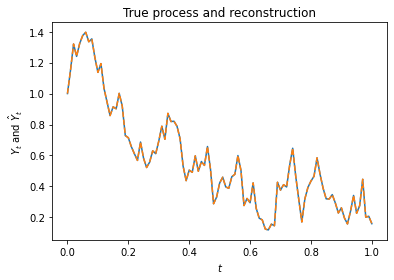

In [271]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_3, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Bernoullis

In [286]:
n = 1
p = 0.5

In [287]:
n_sim = 1000
k = 15
A = np.random.binomial(n, p, size=(k,k))*2 - 1
b = np.random.binomial(n, p, size=k)*2 - 1
Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
Z_big[0:N,].shape

(101, 15)

In [288]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z

In [289]:
model3 = Ridge(alpha=1.0)
model3.fit(Z_big, Y_big)

Ridge()

In [290]:
r_sq_3 = model3.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.9999934115074958


In [291]:
print(f"intercept: {model3.intercept_}")

intercept: 0.6537719058393197


In [292]:
print(f"coefficients: {model3.coef_}")

coefficients: [ 0.34625078 -0.16630892  0.61687863  0.0625812  -0.06534612 -0.21724357
 -0.50409744 -0.16014578  0.27100399 -0.13381845 -0.34656681  0.20159911
  0.04912659 -0.40957276 -0.03678087]


In [293]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

In [294]:
Y_pred_3 = model3.predict(Z)

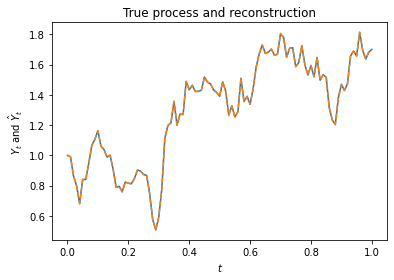

In [295]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_3, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

## 4-Dimensional Ornstein–Uhlenbeck process

### Constructing the process

In [27]:
y0_4, mu_4 = np.array([1,1,1,1]), np.array([1,1,1,1])
sigma_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
theta_4 = np.array([[1,1/2,1/3,1/4], [2,1,2/3,2/4], [3,3/2,1,3/4], [4,2,4/3,1]])
Y_4 = np.zeros((N,4))
Y_4[0] = y0
brow_4 = np.zeros((N+1,4))
#sigma_4 = theta_4

In [28]:
b = Brownian()

for i in range(4):
    brow_4[:,i] = b.gen_normal(N+1)
db_4 = np.diff(brow_4, axis = 0)

In [29]:
for i in range(N-1):
    Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

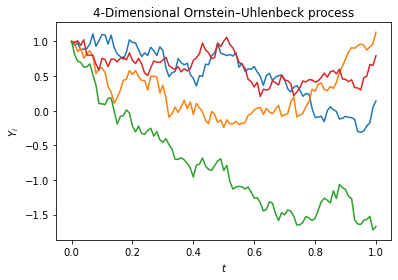

In [30]:
for i in range(4):
    plt.plot(x_axis, Y_4[:,i])

plt.title("4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

In [31]:
k_4 = 10
A_4 = np.random.normal(0, 1, size=(4, k, k))
b_4 = np.random.normal(0, 1, size=(4,k))
dY_4 = np.diff(Y_4, axis = 0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1

In [32]:
dY_4.shape

(100, 4)

In [33]:
for i in range(N-1):
    for j in range(4):
        Z_4[i+1] = Z_4[i] + (A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]

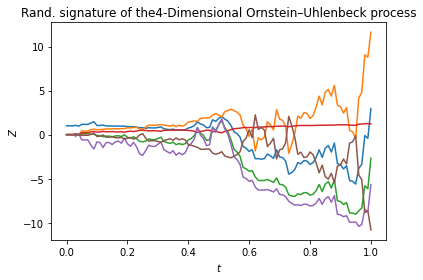

In [34]:
for i in range(6):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. signature of the4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()